In [22]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import jellyfish
%matplotlib inline
import scipy.stats
import sklearn.preprocessing
import webbrowser
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
import networkx as nx


In [3]:
data=pd.read_csv('C:/Users/jpisel/Downloads/output/NationalNames.csv')

In [4]:
dataf=pd.DataFrame(data)

In [5]:
#enter a year from 1880 to 2014 and select a gender as either M or F
year=1888
gender="M"
sel=dataf[(dataf["Year"]==year) & (dataf["Gender"]==gender)]

In [6]:
compare=np.zeros(shape=(np.shape(sel)[0],np.shape(sel)[0]))
for i in range(0,np.shape(sel)[0]):
    for j in range(0,np.shape(sel)[0]):
        comp=jellyfish.damerau_levenshtein_distance(unicode(sel["Name"].iloc[i]),unicode(sel["Name"].iloc[j]))
        compare[i,j]+=comp

In [169]:
thresh=np.percentile(np.ndarray.flatten(compare*2),5)

In [170]:
compares=compare*2
counted=pd.DataFrame.as_matrix(dataf[(dataf["Year"]==year) & (dataf["Gender"]==gender)][[4]])

In [171]:
weigh=(np.sum(((compares-np.max(compares))),1)/np.max(np.sum(((compares-np.max(compares))),1)))
combined=counted.flatten()*weigh
secondweight=((combined/np.max(combined))-1)*-100

In [172]:
df2=pd.DataFrame(secondweight)
dataf['secondweight']=pd.Series(secondweight,np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1)))
dataf[(dataf["Year"]==year) & (dataf["Gender"]==gender)]

,Id,Name,Year,Gender,Count,secondweight
18976,18977,John,1888,M,9248,-0.000000
18977,18978,William,1888,M,8705,25.243374
18978,18979,James,1888,M,5562,40.306415
18979,18980,George,1888,M,4912,51.439765
18980,18981,Charles,1888,M,4591,58.056765
18981,18982,Frank,1888,M,3459,63.870395
18982,18983,Joseph,1888,M,2993,71.628844
18983,18984,Robert,1888,M,2815,72.446201
18984,18985,Harry,1888,M,2759,70.856339
18985,18986,Henry,1888,M,2596,72.658757


In [173]:
'''
counts=pd.DataFrame.as_matrix(dataf[(dataf["Year"]==1880) & (dataf["secondweight"]>0)][[1,5]])
tags=make_tags(counts,minsize=90, maxsize=100)
create_tag_image(tags, 'cloud_large.png', size=(1800, 1200), fontname='Lobster')
webbrowser.open('cloud_large.png')
'''

'\ncounts=pd.DataFrame.as_matrix(dataf[(dataf["Year"]==1880) & (dataf["secondweight"]>0)][[1,5]])\ntags=make_tags(counts,minsize=90, maxsize=100)\ncreate_tag_image(tags, \'cloud_large.png\', size=(1800, 1200), fontname=\'Lobster\')\nwebbrowser.open(\'cloud_large.png\')\n'

In [174]:
mtemp=np.pad(compare,pad_width=((0,0),(5,0)) ,mode='constant',constant_values=0)

In [223]:
preinverse=scipy.stats.threshold(compare,threshmin=np.percentile(np.ndarray.flatten(compare*2),17))

In [224]:
A=preinverse
G=nx.from_numpy_matrix(A)
connections=nx.degree_centrality(G)

In [225]:
pos=nx.spring_layout(G, k=0.5, iterations=20,scale=50)
#nx.draw(G,pos)



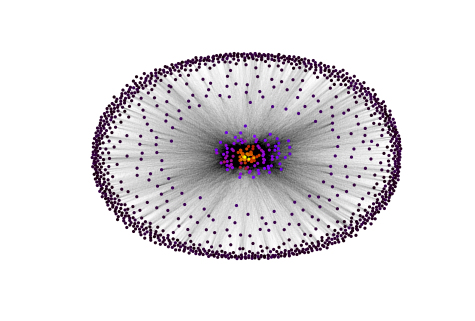

In [226]:
nx.draw(G,pos, node_color=np.array(connections.values()),node_size=10,cmap=plt.cm.gnuplot, linewidths=.01, width=.001)
#plt.savefig("D:/names/"+str(year)+gender+".jpg", format="JPG")

In [142]:
connections.values()

[0.04336734693877551,
 0.050170068027210885,
 0.030612244897959183,
 0.03316326530612245,
 0.03401360544217687,
 0.03401360544217687,
 0.05952380952380952,
 0.04251700680272109,
 0.04591836734693877,
 0.03996598639455782,
 0.05357142857142857,
 0.05187074829931972,
 0.031462585034013606,
 0.03826530612244898,
 0.04081632653061224,
 0.04081632653061224,
 0.16241496598639454,
 0.03741496598639456,
 0.04421768707482993,
 0.06802721088435373,
 0.036564625850340135,
 0.022959183673469385,
 0.04081632653061224,
 0.027210884353741496,
 0.3052721088435374,
 0.05357142857142857,
 0.025510204081632654,
 0.05357142857142857,
 0.02806122448979592,
 0.02976190476190476,
 0.04846938775510204,
 0.04336734693877551,
 0.04336734693877551,
 0.052721088435374146,
 0.02465986394557823,
 0.04336734693877551,
 0.03741496598639456,
 0.046768707482993194,
 0.0391156462585034,
 0.04251700680272109,
 0.03826530612244898,
 0.7100340136054422,
 0.0391156462585034,
 0.03571428571428571,
 0.04081632653061224,
 0.05

In [126]:
connections=nx.degree_centrality(G)

In [81]:
array = np.empty(shape=(2, len(connections)), dtype=float)
names = 0
values = 1
array[names]=connections.keys()
array[values] = connections.values()

In [82]:
degreeconn=np.ndarray.flatten(array[1::2])

In [104]:
df3=pd.DataFrame(degreeconn)
df3
start=np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1))[0]
end=np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1))[-1]
dataf['connectivity']=pd.Series(degreeconn,np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1)))
datafchunk=dataf[start:end]

In [117]:
datafout=pd.DataFrame.sort(datafchunk, columns='connectivity')
datafout.to_csv("D:/names/"+str(year)+gender+".csv")

In [96]:
np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1))[-1]

17501